# Let's explore EXFOR offerings for Ca40

In [1]:
import pickle
from pathlib import Path
from periodictable import elements
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import exfor_tools

Using database version x4i3_X4-2023-04-29 located in: /home/beyerk/mambaforge/envs/sage/lib/python3.11/site-packages/x4i3/data


In [3]:
from query_elastic import print_failed_parses, query_elastic_data, reattempt_parse

In [4]:
import jitr

In [5]:
proton = (1, 1)
neutron = (1, 0)

In [6]:
target =(144, 62)

In [7]:
(
    (entries_pp, failed_parses_pp),
    (entries_ppr, failed_parses_ppr),
    (entries_nn, failed_parses_nn),
) = query_elastic_data(target)


Parsing (p,p) ...
Found subentry E0773006 with the following columns:
['EN', 'POL-BM-MIN', 'POL-BM-MAX', 'ANG-CM', 'DATA-CM', 'DATA-CM']
Failed to parse subentry E0773006:
	Error while parsing E0773006: Expected only one DATA column, found 2
Found subentry E0904044 with the following columns:
['EN', 'POL-BM-MIN', 'POL-BM-MAX', 'ANG-CM', 'DATA-CM']
Found subentry O0032069 with the following columns:
['EN', 'ANG-CM', 'DATA', 'ERR-S']

Succesfully parsed 2 entries for (p,p)
Failed to parse 1 entries



Parsing (p,p) ratio ...

Succesfully parsed 0 entries for (p,p) ratio
Failed to parse 0 entries



Parsing (n,n)...

Succesfully parsed 0 entries for (n,n)
Failed to parse 0 entries




# $(p,p)$

## Handle failed parses for $(p,p)$
- E0773006 is a polarized measurement, not relevant here. I believe the reaction quantity is mislabeled.

In [ ]:
print_failed_parses(failed_parses=failed_parses_pp)

## Reject none-useful, discrepant our outlying experiments

# $(p,p)$ ratio

## handle failed parses for $(p,p)$ ratio

In [ ]:
print_failed_parses(failed_parses=failed_parses_ppr)

## Reject non-useful, discrepant our outlying experiments

## handle failed parses for $(n,n)$ ratio

In [ ]:
print_failed_parses(failed_parses=failed_parses_nn)

# Plotting

## Plot $(p,p)$

In [8]:
measurements_categorized = exfor_tools.categorize_measurements_by_energy(
    entries_pp, min_num_pts=4
)

In [11]:
[[(m.subentry, m.Einc) for m in l] for l in measurements_categorized]

[[('E0904044', 65.0), ('O0032069', 65.0)]]

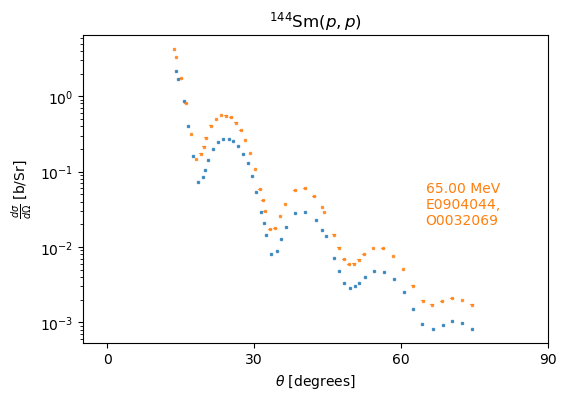

In [16]:
n_per_plot = 10
N = len(measurements_categorized)
num_plots = N // n_per_plot
left_over = N % n_per_plot
if left_over > 0:
    num_plots += 1


fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 4))
if not isinstance(axes,np.ndarray):
    axes = [axes]
for i in range(num_plots):
    idx0 = i * n_per_plot
    if i == num_plots - 1:
        idxf = N 
    else:
        idxf = (i + 1) * n_per_plot

    exfor_tools.plot_angular_distributions(
        measurements_categorized[idx0:idxf],
        axes[i],
        offsets=100,
        data_symbol=list(entries_pp.values())[0].data_symbol,
        rxn_label=list(entries_pp.values())[0].rxn,
        label_kwargs={
            "label_xloc_deg": 65,
            "label_offset_factor": 0.02,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
    )
    axes[i].set_xlim([-5, 90])

In [20]:
entries_pp

{'E0904': <exfor_tools.exfor_tools.ExforEntryAngularDistribution at 0x703a8436cad0>,
 'O0032': <exfor_tools.exfor_tools.ExforEntryAngularDistribution at 0x703a851abed0>}

In [19]:
entries_pp['E0904'].measurements[0].y_err

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
entries_pp['O0032'].measurements[0].y_err

array([1.85e-02, 1.63e-02, 1.18e-02, 5.70e-03, 2.50e-03, 1.30e-03,
       1.50e-03, 2.40e-03, 2.40e-03, 3.30e-03, 3.20e-03, 4.80e-03,
       4.70e-03, 4.60e-03, 3.50e-03, 3.80e-03, 1.90e-03, 1.50e-03,
       8.20e-04, 5.00e-04, 3.80e-04, 3.60e-04, 1.90e-04, 2.50e-04,
       2.30e-04, 4.50e-04, 5.50e-04, 3.10e-04, 2.80e-04, 2.40e-04,
       1.80e-04, 1.30e-04, 9.10e-05, 8.70e-05, 8.10e-05, 7.10e-05,
       7.50e-05, 8.20e-05, 9.00e-05, 8.00e-05, 7.10e-05, 5.90e-05,
       3.60e-05, 3.30e-05, 2.70e-05, 2.30e-05, 2.40e-05, 2.40e-05,
       2.20e-05])

## comments on data: 
    - clearly these two data sets (same author in ssubsequent years) is exactly the same with different normalizations

## plot $(p,p)$ ratio

## Plot $(n,n)$

# Write data to disk

In [ ]:
A, Z = target
with open(f"{elements[Z]}{A}_diff_xs.pkl", "wb") as f:
    pickle.dump({"n,n": entries_nn, "p,p": { "absolute" :  entries_pp , "ratio" : entries_ppr }}, f)